In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ultimo_tracks.csv')
data

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Buon viaggio,Ultimo,Peter Pan,2018-02-09,6A8e89BJRo7tgJ3tD94Lze,60,0.5640,0.523,191492,0.491,0.000000,0,0.1140,-6.566,1,0.0470,86.361,0.3310
1,Canzone stupida,Ultimo,Peter Pan,2018-02-09,27uxkkTEbs8h2EVNt96lk5,60,0.4880,0.589,236500,0.743,0.000000,11,0.0823,-3.522,0,0.2570,124.350,0.6790
2,La stella più fragile dell'universo,Ultimo,Peter Pan,2018-02-09,3iHqUSg0LBRxAF5CzjBK9y,68,0.9120,0.584,226000,0.261,0.000000,7,0.1340,-8.293,1,0.0569,137.354,0.3400
3,Cascare nei tuoi occhi,Ultimo,Peter Pan,2018-02-09,60oJSn5MTG2VNvCJKwd65M,75,0.5410,0.732,226160,0.460,0.000000,0,0.0896,-8.629,1,0.1040,67.983,0.4050
4,Poesia senza veli,Ultimo,Peter Pan,2018-02-09,3f2b204xj4jZdoHjo9wj0W,71,0.7520,0.739,218167,0.519,0.000000,8,0.2220,-7.461,0,0.1250,81.991,0.2550
5,Il ballo delle incertezze,Ultimo,Peter Pan,2018-02-09,0Wq6iAraiUpSbBSPmv4gLu,69,0.4450,0.654,203750,0.760,0.000000,3,0.0548,-5.058,1,0.1850,144.098,0.4130
6,Peter Pan - Vuoi volare con me?,Ultimo,Peter Pan,2018-02-09,3qbMJGhSNdeKdz407PA6x4,65,0.3180,0.606,226542,0.424,0.000000,2,0.0888,-6.668,1,0.0405,139.797,0.2450
7,Dove il mare finisce,Ultimo,Peter Pan,2018-02-09,4VWyOKIxLsvjkL3PEjFjuh,59,0.0867,0.724,200352,0.851,0.000000,10,0.1020,-4.569,1,0.0480,122.964,0.6030
8,Le stesse cose che facevo con te,Ultimo,Peter Pan,2018-02-09,69BLsJ1hNXLOAKkSGaplb8,57,0.3500,0.689,192625,0.419,0.000000,2,0.1120,-6.802,1,0.0656,68.040,0.2820
9,Ti dedico il silenzio,Ultimo,Peter Pan,2018-02-09,6GLmGfALwjzCaOiHwgfU7g,72,0.1750,0.661,234250,0.443,0.000000,8,0.1770,-9.303,1,0.0688,80.000,0.1470


In [3]:
data.shape

(30, 18)

## Rozkład taneczności na dyskografii Ultimo

In [4]:
def vertical_line(x, **kwargs):
    plt.axvline(0.5, **kwargs)

In [5]:
def distplot(data, row, cat):
    dist = sns.FacetGrid(data, row=row, height=2, aspect=4,)
    dist.map(sns.distplot, cat, hist=False, rug=True, kde_kws={"shade": True})
    dist.map(vertical_line, cat)
    plt.xlim(0, 1)

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


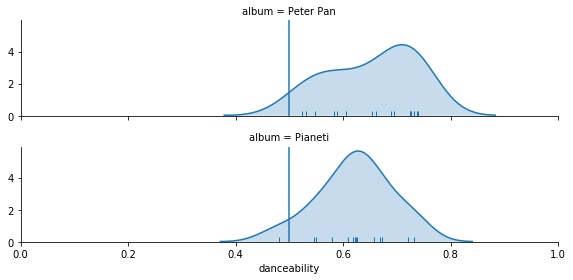

In [6]:
distplot(data, 'album', 'danceability')

## Czy muzyka Ultimo jest pozytywna?

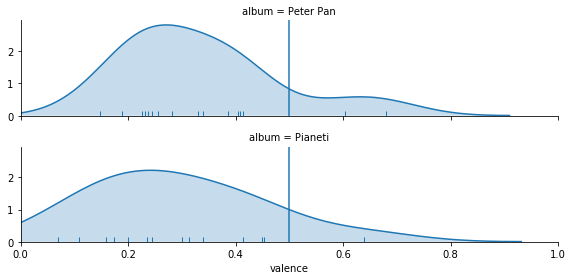

In [7]:
distplot(data, 'album', 'valence')

## Czy piosenki z poszczególnych albumów są do siebie podobne? PCA

**UWAGA:** Zauważyłam, że wykorzystanie PCA do grupowania piosenek z albumów nie daje żadnych sensownych wniosków (poza tym, że piosenki nie są na tyle unikalne, żeby grupowanie w ten sposób coś dało). Chcę potem powtórzyć PCA, ale nie grupować piosenek albumami, ale popularnością, którą wyznaczam w kolejnym podpunkcie.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]
x = data.loc[:, features].values
y = data.loc[:, ['album']].values

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
pd.DataFrame(data=x, columns=features).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.304489,-1.579127,-1.057658,-0.075698,-0.279261,-1.325873,-0.237062,0.809856,0.5,-0.765830,-1.076644,0.103650
1,0.012180,-0.681174,1.049428,1.505174,-0.279261,1.610624,-0.693522,2.595716,-2.0,1.319186,0.212451,2.473574
2,1.642959,-0.749201,0.557862,-1.518557,-0.279261,0.542807,0.050926,-0.203344,0.5,-0.667536,0.653721,0.164941
3,0.216027,1.264390,0.565352,-0.270170,-0.279261,-1.325873,-0.588407,-0.400469,0.5,-0.199897,-1.700271,0.607599
4,1.027571,1.359627,0.191154,0.099955,-0.279261,0.809761,1.318071,0.284775,-2.0,0.008605,-1.224932,-0.413919


In [12]:
pca = PCA(n_components=2)

In [13]:
principal_components = pca.fit_transform(x)

In [14]:
principal_data = pd.DataFrame(data=principal_components,
                             columns=['PC1', 'PC2'])

In [15]:
principal_data.head()

,PC1,PC2
0,-0.749882,-0.730853
1,4.270472,1.505249
2,-1.565045,0.676216
3,-0.279969,-0.764590
4,0.650451,1.492857


In [16]:
final_data = pd.concat([principal_data, data.album], axis=1)

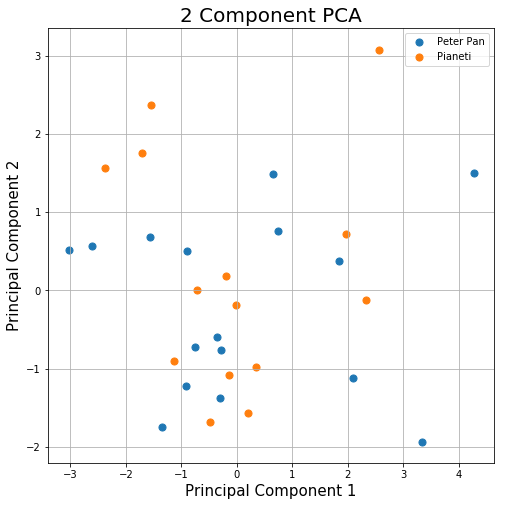

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()

targets = [
    'Peter Pan',
    'Pianeti'
]
colors = [
    'tab:blue',
    'tab:orange',
]
for target, color in zip(targets, colors):
    indicesToKeep = final_data['album'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'PC1'],
               final_data.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)

## Rozkład popularności twórczości Ultimo na Spotify (stan z dn. 5 kwietnia 2019)

Popularność danej piosenki determinują dwa czynniki: całkowita ilość odtworzeń w porównaniu do innych oraz **jak dawne są to odtworzenia**. Przez to z czasem, kiedy piosenka przestaje być słuchana z taką częstotliwością jak wcześniej, jej popularność spada.

Co więcej, jeśli na Spotify dostępne są **dwie różne wersje** danej piosenki (np. wersja z singla i z albumu), Spotify traktuje je jako **dwa różne utwory** (chociaż dane dot. charakterystyki muzycznej są takie same). W swoich danych ograniczyłam się do piosenek z albumów i EP, pomijając single. Przykładem jest popularność utworu *Tamagotchi* w wersji singlowej i albumowej (odpowiednio 58 i 57).

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


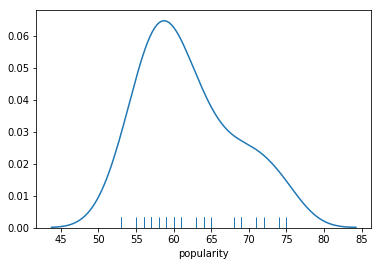

In [23]:
sns.distplot(data.popularity, rug=True, hist=False)

In [24]:
data[data['popularity'] >= 55].sort_values(['popularity'], ascending=False)

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
3,Cascare nei tuoi occhi,Ultimo,Peter Pan,2018-02-09,60oJSn5MTG2VNvCJKwd65M,75,0.5410,0.732,226160,0.460,0.000000,0,0.0896,-8.629,1,0.1040,67.983,0.4050
18,Pianeti,Ultimo,Pianeti,2017-10-06,2w5wtWq30yTkNSG9YjMFvW,74,0.2810,0.550,224000,0.488,0.000000,8,0.3720,-9.425,1,0.1960,80.112,0.1080
9,Ti dedico il silenzio,Ultimo,Peter Pan,2018-02-09,6GLmGfALwjzCaOiHwgfU7g,72,0.1750,0.661,234250,0.443,0.000000,8,0.1770,-9.303,1,0.0688,80.000,0.1470
4,Poesia senza veli,Ultimo,Peter Pan,2018-02-09,3f2b204xj4jZdoHjo9wj0W,71,0.7520,0.739,218167,0.519,0.000000,8,0.2220,-7.461,0,0.1250,81.991,0.2550
5,Il ballo delle incertezze,Ultimo,Peter Pan,2018-02-09,0Wq6iAraiUpSbBSPmv4gLu,69,0.4450,0.654,203750,0.760,0.000000,3,0.0548,-5.058,1,0.1850,144.098,0.4130
27,Sogni appesi,Ultimo,Pianeti,2017-10-06,2HgBmx6tfhRO417ahshpeQ,69,0.9040,0.732,212864,0.428,0.000000,9,0.1370,-9.654,1,0.1190,127.413,0.6390
2,La stella più fragile dell'universo,Ultimo,Peter Pan,2018-02-09,3iHqUSg0LBRxAF5CzjBK9y,68,0.9120,0.584,226000,0.261,0.000000,7,0.1340,-8.293,1,0.0569,137.354,0.3400
6,Peter Pan - Vuoi volare con me?,Ultimo,Peter Pan,2018-02-09,3qbMJGhSNdeKdz407PA6x4,65,0.3180,0.606,226542,0.424,0.000000,2,0.0888,-6.668,1,0.0405,139.797,0.2450
23,Ovunque tu sia,Ultimo,Pianeti,2017-10-06,5SdYb5G6YbYDgS7jMRqPOQ,64,0.4760,0.721,199659,0.533,0.000000,7,0.1090,-8.498,1,0.0972,115.919,0.4130
21,Racconterò di te,Ultimo,Pianeti,2017-10-06,1c1f9Xtqp0dwUkXYndACqe,64,0.7970,0.624,204634,0.580,0.000000,2,0.1000,-6.852,1,0.2110,80.327,0.1730


## Czy najpopularniejsze piosenki Ultimo mają podobne parametry muzyczne? PCA

to do: to samo co w poprzednim PCA tylko zamiast grupowania po albumie grupowanie po popularności